

*   Donelli Francesco
*   Foggetti Marco

*   Larosa Nicolas








#About the dataset

The goal of our analysis is to **classify Genres of films based on their plots**.

For our project we used the dataset 'wiki_movie_plots_deduped', containing records of plot, cast, title, director, origin release, year and genre for about 34000 films. 

The dataset was developed taking information from the wikipedia page of each film.

Below, we upload the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/University/DAB/Text Mining/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/University/DAB/Text Mining


In [ ]:
import pandas as pd
df=pd.read_csv('wiki_movie_plots_deduped.csv')

In [ ]:
#Number of films in the dataset
df.shape

(34886, 8)

In [ ]:
#Number of different genres in the dataset
df['Genre'].nunique()

2265

The dataset is composed of 34886 rows (films) and 8 column while all films are chategorized on 2265 different genres at a first glance. 

In [ ]:
#Dataframe visualization
print(df.columns)
df.head()

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


#Data Cleaning

First, we check for duplicates and null values

The number of duplicate row is: 0
Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64


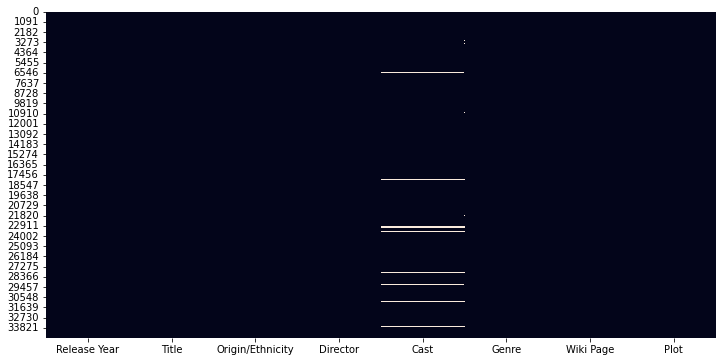

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check for Null values and duplicates
print(f'The number of duplicate row is: {df.duplicated().sum()}')
print(df.isnull().sum())

#Graphical representation of Nan
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar = False)
plt.show()
#since we get nulls only in the cast column, no need to drop the corresponding rows

Just by looking at the head of the dataframe we observed that some movies have an unknown genre. 

6083


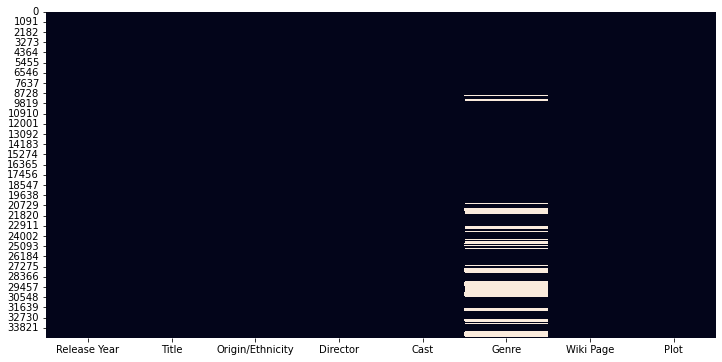

In [ ]:
#Amount of unknown genres
unknowns=df[df['Genre'] == 'unknown']
print(unknowns.shape[0])

#Graphical representation of unknown genres
plt.figure(figsize=(12,6))
sns.heatmap(df.isin(['unknown']), cbar=False)
plt.show()

In [ ]:
unknowns.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


We can observe that the films with an **unknown** genre are 6083: we decide to drop them for the implementation of the models as they would not provide any extra information and statistical power. 
Anyway, we save them as 'unknowns' for prediction at the end. 

In [ ]:
df = df[df['Genre'] != 'unknown']
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
12,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short film,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,Irish villager Kathleen is a tenant of Captain...


Since the dataset has a lot of genres, and some of them are a combination of two genres like 'Sport and Action', or two different genres that are very similar like 'biographic' and 'biography', we defined a function to group similar genres together and reduce the number of classes.



First, we create a function to group together similar genres and genres that are a combintation of two or more genres, like 'Sport and Action' or 'Drama and Comedy'. Doing this, we reduce the number of total classes and are able to develop a better performing model.

In [ ]:
def group_genres(dataset):
  dati=list(dataset) #store the input as a list so that it is iterable
  for i in range(len(dati)): 
    current_word=dati[i] #store the genre at row i of the dataset
    for j in range(1,len(dati)):
      new_word=current_word #set a variable new_word equal to current_word
      if new_word in dati[j]: #if new_word is contained in another genre of the dataset
               dati[j]=new_word #the genre becomes new_word              

  return dati #retur the grouped genres
new_genres=group_genres(df['Genre']) #apply the function to the dataframe

We can see the resulting genres below

In [ ]:
y=[]
for i in range(len(new_genres)):
  if new_genres[i] not in y:
    y.append(new_genres[i]) #store unique genres in a list
print(y)

['western', 'comedy', 'short', 'biographic', 'drama', 'adventure', 'sport', 'horror', 'crime', 'fantasy', 'epic', 'historic', 'biography', 'mystery', 'romance', 'exploitation', 'spy', 'propaganda', 'biopic', 'animated', 'swashbuckler', 'documentary', 'war', 'thriller', ' ', 'race', 'music', 'operetta', 'detective', 'action', 'romantic', 'animation', 'serial', 'suspense', 'gangster', 'biblical', '-', 'family', 'art', 'aviation', 'experimental', 'nature', 'educational', 'slapstick', 'espionage', 'p.o.w.', 'disaster', 'adult', 'travel', 'slasher', 'compilation', 'biker', 'anthology', 'mockumentary', 'blaxploitation', 'ero', 'teen', 'parody', 'imax', 'children', 'shakespearean', 'independent', 'satire', 'reality', 'dramedy', 'dance', 'concert', 'spoof', 'social', 'survival', 'slahser', 'christian', 'anime', 'imdb', 'counterculture', 'period', 'sf', 'tragedy', 'wuxia', 'history', 'sword', 'bruceploitation', 'duology', 'triad', 'mythology', 'devotional', 'costume', 'religious', 'political', 

We don't have two genres classified together anymore, but there are still similar genres that have not been grouped, grammar errors like 'ero' that stands for 'hero' and strange categories like [140] and [144]. Below, we group and adjust these labels.

In [ ]:
for i in range(len(new_genres)):
  if new_genres[i]=='biographic' or new_genres[i]=='biopic': 
    new_genres[i]='biography'
  if new_genres[i]=='comedey' or new_genres[i]=='dramedy': 
    new_genres[i]='comedy'
  if new_genres[i]=='ero' or new_genres[i]=='race' or new_genres[i]=='biker' : 
    new_genres[i]='action'
  if new_genres[i]=='anime' or new_genres[i]=='animation' : 
    new_genres[i]='animated'
  if new_genres[i]== 'love':
    new_genres[i]='romance'
  if new_genres[i]=='christian' or new_genres[i]=='devotional' or new_genres[i]=='biblical' : 
    new_genres[i]='religious'
  if new_genres[i]=='cowboy': 
    new_genres[i]='western'
  if new_genres[i]=='politics': 
    new_genres[i]='political'
  if new_genres[i]=='operetta': 
    new_genres[i]='music'
  if new_genres[i]=='spy' or new_genres[i]=='detective' or new_genres[i]=='espionage' : 
    new_genres[i]='investigative'
  if new_genres[i]=='mythological': 
    new_genres[i]='mythology'

In [ ]:
#store the new genres in the dataset
for i in range(len(df)):
  df['Genre'].iloc[i]=new_genres[i]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Remove genres that are meaningless
df = df[df['Genre'] != '-']
df = df[df['Genre'] != '[140]']
df = df[df['Genre'] != '[144]']
df = df[df['Genre'] != ' ']

Number of different genres:  95
Length of the dataset 27535
drama              8637
comedy             7247
horror             1377
action             1339
thriller           1290
                   ... 
sf                    1
bruceploitation       1
duology               1
triad                 1
splatter              1
Name: Genre, Length: 95, dtype: int64


Text(0.5, 1.0, 'Number of Plots per Genre')

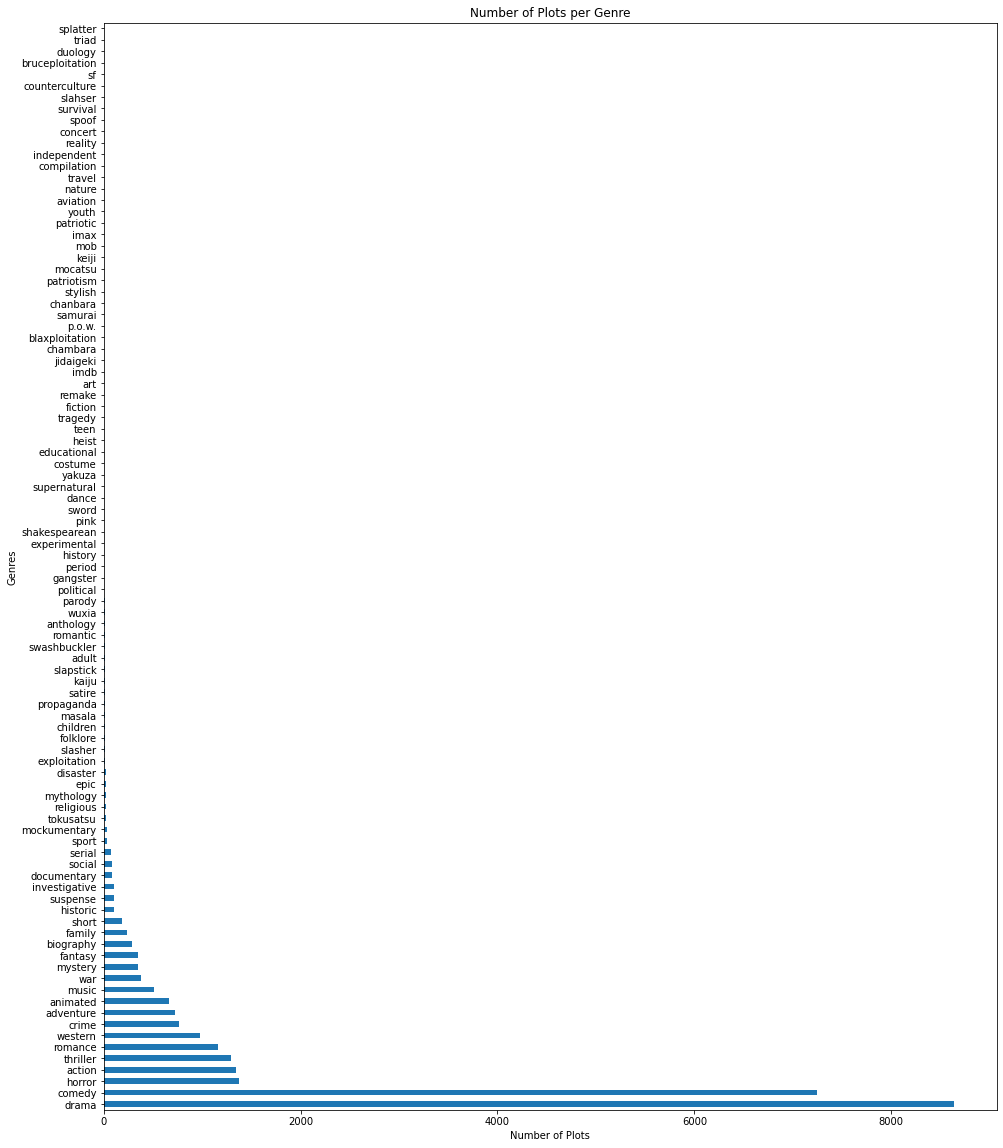

In [ ]:
#number of unique genres after grouping and new length of the dataset
print('Number of different genres: ',df['Genre'].nunique())
print('Length of the dataset', len(df))
#take a look at some of the new genres
vc = df['Genre'].value_counts()
print(vc)
#Graphical visualization
plt.figure(figsize=(16,20))
df['Genre'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')

We see that there are genres that we couldn't group with any others that are under-represented, with just one observatation.

Since we still got too many genres to develop a well-perfoming model, and many of them have few observations in the dataset, we decided to consider only genres with more than 100 observations, since, on such a large dataset (27535 rows) it would be difficult for a model to classify and represents categories with too low observations.


In [ ]:
#We remove from the dataset the above genres
df=df[df.Genre.isin(vc.index[vc.gt(100)])]
print('Number of different genres: ',df['Genre'].nunique())
print('Length of the dataset: ', len(df))

Number of different genres:  20
Length of the dataset:  26793


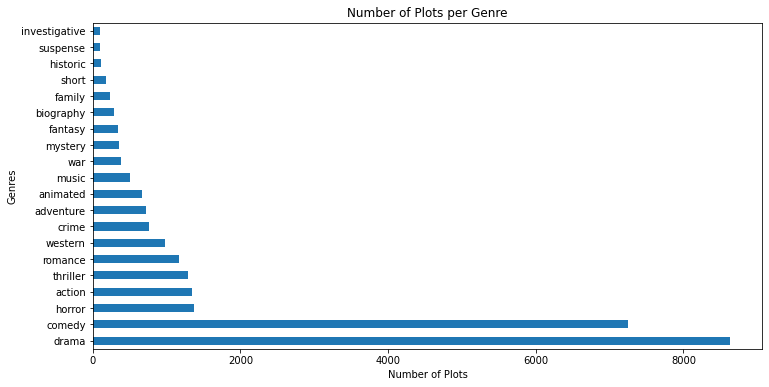

In [ ]:
#Now, the distribution of classes in our dataset looks like this
plt.figure(figsize = (12,6))
df['Genre'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')
plt.show()

Comedy and Drama categories are over-represented, hence the dataset is unbalanced. 

We decided to rebalance the dataset considering 2000 films for both comedies and dramas

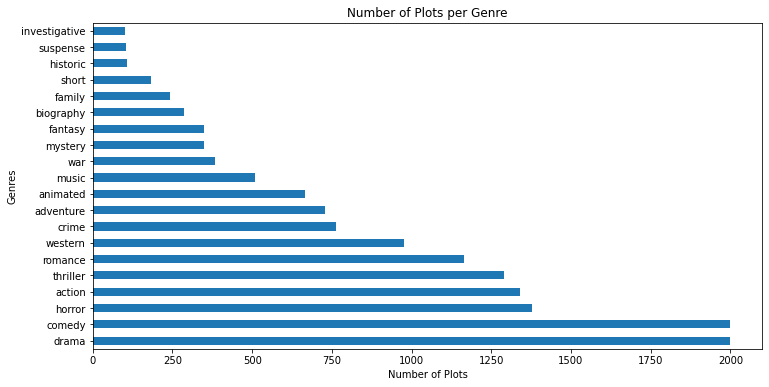

In [ ]:
from sklearn.utils import resample

comedies = df[df['Genre'] == 'comedy'] #df with only comedy movies
sample_com = resample(comedies, replace = False, n_samples = 2000, random_state= 1234) 
#take 2000 random observation from comedies

dramas = df[df['Genre'] == 'drama'] #df with only drama movies
sample_drama = resample(dramas, replace = False, n_samples= 2000, random_state= 1234)  
#take 2000 random observation from comedies

df = df[df['Genre'] != 'comedy'] #remove comedy and drama from the original dataframe
df = df[df['Genre'] != 'drama']

df = pd.concat([df, sample_com, sample_drama]) 
#add comedy and drama rebalanced to the original df

plt.figure(figsize = (12,6))
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')
df['Genre'].value_counts().plot(kind = 'barh') #show classes distribution
plt.show()

In [ ]:
#We finally get to 20 genres and almost 15000 observations.
print(df['Genre'].nunique())
len(df)

20


14909

Now that we have adjusted the genres, we can work on the plots of the dataset. 

Here's an example of a plot of the dataset

In [ ]:
df['Plot'][6]

"The film opens with two bandits breaking into a railroad telegraph office, where they force the operator at gunpoint to have a train stopped and to transmit orders for the engineer to fill the locomotive's tender at the station's water tank. They then knock the operator out and tie him up. As the train stops it is boarded by the bandits\u200d—\u200cnow four. Two bandits enter an express car, kill a messenger and open a box of valuables with dynamite; the others kill the fireman and force the engineer to halt the train and disconnect the locomotive. The bandits then force the passengers off the train and rifle them for their belongings. One passenger tries to escape but is instantly shot down. Carrying their loot, the bandits escape in the locomotive, later stopping in a valley where their horses had been left.\r\nMeanwhile, back in the telegraph office, the bound operator awakens, but he collapses again. His daughter arrives bringing him his meal and cuts him free, and restores him to

#Data Pre-Processing

The plot is very long and complex, so we decided to remove stopwords and special characters to consider only most meaningful words of the plots.

In [ ]:
import re
df['Plot'] = df['Plot'].apply(lambda x: x.lower()) #set to lower case
df['Plot'] = df['Plot'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) #remove special characters
df['Plot'] = df['Plot'].apply(lambda x: re.sub('[ \t\n\r\f\v]', ' ', x))

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

df = df.reset_index(drop=True)
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text
df['Plot'] = df['Plot'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Now, a plot looks like this
df['Plot'][6]

'film opens town mexican border poker game going local saloon one players cheats shot dead another players mexican named pedro uproar follows pedro wounded escapes saloon sheriff called tracks pedro home pedro kills sherriff pedro hides wife juanita arrested suspicion murdering sheriff pedro rescues town jail two head mexican border caught posse reach border juanita killed film ends pedro arrested taken back town'

#Exploratory Data Analysis

## **Topic Modeling**

In order to study our text distribution we decide to implement a topic modeling method: **LDA (Latent Dirichlet Allocation)**

Topic modeling allows to efficiently analyze large volumes of text by clustering documents into topics. In particular it is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we're not sure what we're looking for.

Therefore, we want to use this method to compare the topics found with the actual categories we've derived through the process of data cleaning and consolidation.

### **Latent Dirichlet Allocation (LDA)**

The LDA method is based on the Dirichlet probability distribution, most used as the prior distribution of categorical variables or multinomial variables in Bayesian mixture models and other hierarchical Bayesian models.

Assumptions:
*   Documents with similar topics use similar groups of words
*   Latent topics can then be found by searching for groups of words that frequently occur together in documents across the corpus
* Documents are probability distributions over latent topics
* Topics themselves are probability distributions over words

Other assumptions:


1.   Each document is a bag of words: the order of the words and the grammatical role of the words (subject, object, verbs...) are not considered in the model 
2.   Words like am/is/are/of/a/the/but/... don't carry any information about the topics and therefore can be eliminated from the documents as a preprocessing step

**Implementation**

We decide to use Gensim, which is an open-source library for topic modeling.

Here, we import the necessary libraries:

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=78a2919f9840735ddddd42511dc713a203e73d2cbcc0481db36c6b115a7f0b0c
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=798d693c45c3e5cf1ff4c79736c98525625c6a646e65971d2b1cc7611075aab5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import nltk
import numpy as np
import pandas as pd
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy

#vis
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


We remove from the dataframe the variables we're not interested in for our task. 

In [ ]:
df_lda = df.drop(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1)
df_lda.head()

,Genre,Plot
0,western,film opens two bandits breaking railroad teleg...
1,short,rarebit fiend gorges welsh rarebit restaurant ...
2,western,film features train traveling rockies hold cre...
3,short,irish villager kathleen tenant captain clearfi...
4,biography,boones daughter befriends indian maiden boone ...


We use **lemmatization** to  simplify the representation of a word by reducing it to its base form.

For example, the lemma of the word "jumping" is "jump," and the lemma of the word "jumps" is also "jump": the same word in different forms can be treated as a single word.

Lemmatization is similar to stemming, which is the process of reducing a word to its root form. However, lemmatization takes into account the part of speech of the word and its context in the sentence, while stemming does not. This means that lemmatization is more accurate than stemming, as it can correctly identify the base form of a word even if it is used in a different part of speech.

In [ ]:
def lemmatization(plots, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    plots_out = []
    for Plot in plots:
        doc = nlp(Plot)
        new_Plot = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_Plot.append(token.lemma_)
        final = " ".join(new_Plot)
        plots_out.append(final)
    return (plots_out)


lemmatized_plots = lemmatization(df_lda['Plot'])
print (lemmatized_plots[0][0:1000])

df_lda['Clean_Plot'] = lemmatized_plots

film open bandit break railroad telegraph office force operator gunpoint train stop transmit order engineer fill locomotive tender station water tank knock operator tie train stop board bandit enter express car kill valuable dynamite other kill train disconnect locomotive bandit force train belonging passenger try escape instantly shoot carry loot bandit escape locomotive later stop valley horse leave meanwhile back telegraph office bind operator collapse daughter arrive bring meal cut free restore consciousness douse water comic relief dance hall eastern strange force dance local fire foot door suddenly open telegraph operator rush tell robbery man quickly form overtake bandit final shootout kill recover steal mail


In [ ]:
df_lda['Clean_Plot'][0]

'film open bandit break railroad telegraph office force operator gunpoint train stop transmit order engineer fill locomotive tender station water tank knock operator tie train stop board bandit enter express car kill valuable dynamite other kill train disconnect locomotive bandit force train belonging passenger try escape instantly shoot carry loot bandit escape locomotive later stop valley horse leave meanwhile back telegraph office bind operator collapse daughter arrive bring meal cut free restore consciousness douse water comic relief dance hall eastern strange force dance local fire foot door suddenly open telegraph operator rush tell robbery man quickly form overtake bandit final shootout kill recover steal mail'

Now we can convert text to individual words

In [ ]:
def ind_words(plots):
    final = []
    for Plot in plots:
        new = gensim.utils.simple_preprocess(Plot, deacc=True)
        final.append(new)
    return (final)

data_words = ind_words(df_lda['Clean_Plot'])

print (data_words[0][0:1000])

['film', 'open', 'bandit', 'break', 'railroad', 'telegraph', 'office', 'force', 'operator', 'gunpoint', 'train', 'stop', 'transmit', 'order', 'engineer', 'fill', 'locomotive', 'tender', 'station', 'water', 'tank', 'knock', 'operator', 'tie', 'train', 'stop', 'board', 'bandit', 'enter', 'express', 'car', 'kill', 'valuable', 'dynamite', 'other', 'kill', 'train', 'disconnect', 'locomotive', 'bandit', 'force', 'train', 'belonging', 'passenger', 'try', 'escape', 'instantly', 'shoot', 'carry', 'loot', 'bandit', 'escape', 'locomotive', 'later', 'stop', 'valley', 'horse', 'leave', 'meanwhile', 'back', 'telegraph', 'office', 'bind', 'operator', 'collapse', 'daughter', 'arrive', 'bring', 'meal', 'cut', 'free', 'restore', 'consciousness', 'douse', 'water', 'comic', 'relief', 'dance', 'hall', 'eastern', 'strange', 'force', 'dance', 'local', 'fire', 'foot', 'door', 'suddenly', 'open', 'telegraph', 'operator', 'rush', 'tell', 'robbery', 'man', 'quickly', 'form', 'overtake', 'bandit', 'final', 'shoot

### Bigrams and Trigrams

Now we want to create bigrams and trigrams and incorporate them, so that our model doesn't recognize only individual words.

In the field of natural language processing, a **bigram** is a sequence of two adjacent words in a text. A **trigram** is a sequence of three adjacent words in a text. Bigrams and trigrams are used to analyze the co-occurrence and frequency of word pairs and triplets in a text.

For example, in the text "I like to eat pizza", the bigrams would be "I like", "like to", "to eat", and "eat pizza", and the trigrams would be "I like to", "like to eat", and "to eat pizza".

Bigrams and trigrams can be useful for identifying patterns and relationships in a text.

In [ ]:
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50) 
# min_count specify the number of times words have to appear together to be considered bigrams
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold = 50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(plots):
    return(bigram[doc] for doc in plots)
def make_trigrams(plots):
    return(trigram[bigram[doc]] for doc in plots)

data_bigrams = list(make_bigrams(data_words))
data_bigrams_trigrams = list(make_trigrams(data_bigrams))

print (data_bigrams_trigrams[0])


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['film', 'open', 'bandit', 'break', 'railroad', 'telegraph', 'office', 'force', 'operator', 'gunpoint', 'train', 'stop', 'transmit', 'order', 'engineer', 'fill', 'locomotive', 'tender', 'station', 'water', 'tank', 'knock', 'operator', 'tie', 'train', 'stop', 'board', 'bandit', 'enter', 'express', 'car', 'kill', 'valuable', 'dynamite', 'other', 'kill', 'train', 'disconnect', 'locomotive', 'bandit', 'force', 'train', 'belonging', 'passenger', 'try', 'escape', 'instantly', 'shoot', 'carry', 'loot', 'bandit', 'escape', 'locomotive', 'later', 'stop', 'valley', 'horse', 'leave', 'meanwhile', 'back', 'telegraph', 'office', 'bind', 'operator', 'collapse', 'daughter', 'arrive', 'bring', 'meal', 'cut', 'free', 'restore', 'consciousness', 'douse', 'water', 'comic_relief', 'dance_hall', 'eastern', 'strange', 'force', 'dance', 'local', 'fire', 'foot', 'door', 'suddenly', 'open', 'telegraph', 'operator', 'rush', 'tell', 'robbery', 'man', 'quickly', 'form', 'overtake', 'bandit', 'final', 'shootout', 

As we can see 'comic_relief' or 'dance_hall' are considered bigrams.

### TF-IDF


In order to identify the most important word in the documents we use TF-IDF.

**TF-IDF (Term Frequency - Inverse Document Frequency)** is a statistical measure used to evaluate the importance of a word in a document or a collection of documents. It is commonly used in information retrieval and natural language processing tasks to quantify the relevance of a term to a document or a collection of documents.

TF-IDF is calculated as the product of two factors: the term frequency (TF) and the inverse document frequency (IDF). The term frequency is the number of times a term appears in a document, and the inverse document frequency is a measure of how common or rare the term is across the entire collection of documents.

The idea behind TF-IDF is that words that are more frequently used in a document are likely to be more important to the meaning of the document, and words that are rare across the entire collection of documents are likely to be more specific and informative.

The first step is to create a dictionary that maps words in the corpus to unique integer ids, using the Dictionary class from gensim. 

This dictionary is then used to convert the corpus into a list of lists, where each inner list represents a document in the corpus as a **bag-of-words** (BoW) model. This is done using the doc2bow method, which converts a list of words into a list of (word_id, word_frequency) tuples, where `word_id` is the unique id of the word in the dictionary and `word_frequency `is the number of times the word appears in the document.

Next, the TfidfModel class from `gensim` is used to create a Tf-Idf model for the corpus.

Finally, the code iterates over the documents in the corpus and filters out words that have a low Tf-Idf value (i.e., less than 0.025 in this case). These low-value words are added to a list of words to be removed (low_value_words), along with any words that are present in the BoW representation of the document but not in the Tf-Idf model (words_missing_in_tfidf).

In [ ]:
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

plots = data_bigrams_trigrams

corpus = [id2word.doc2bow(Plot) for Plot in plots] # doc2bow converts a collection
# of words to its bag-of-words representation: a list of (word_id, word_frequency) 2-tuples.
print (corpus[0][0:1000])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.025
words = []
words_missing_in_tfidf = []

# Drop low value words
# looking for words that occur with a 0.025 threshold
# if a word occur with this frequency in all the corpus, then it occurs so frequently
# that it doesn't lend value to the clustering algorithm

for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 4), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 3), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2)]


**Final implementation of the LDA model**

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           chunksize=100, # number of documents to be used in each training chunk
                                           passes=100,
                                           workers = 5
                                            )

**Visualisation**

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.393389 -0.168011       1        1  13.193843
4     -0.392172 -0.025635       2        1  12.240679
9     -0.184929 -0.188337       3        1  11.515175
0     -0.173063 -0.359325       4        1  10.169588
5     -0.169471  0.059593       5        1   8.398779
13     0.007179 -0.123798       6        1   7.021632
17    -0.284893  0.116679       7        1   5.779632
15    -0.300029 -0.266502       8        1   4.781716
19     0.021699 -0.376291       9        1   4.776558
12     0.239359 -0.374020      10        1   2.723657
6      0.233577 -0.200188      11        1   2.599554
16     0.092492  0.311014      12        1   2.384374
8     -0.320721  0.324118      13        1   2.243100
18     0.186471  0.115647      14        1   2.239432
7     -0.129767  0.388106      15        1   2.231870
2      0.050820  0.454022      16        1   1.851093
10     0.407506 -0.171674      17        1   1.625745
11     0.419634 -0.000365      18        1   1.564451
1      0.381332  0.161613      19        1   1.443879
3      0.308364  0.323354      20        1   1.215243, topic_info=          Term          Freq         Total Category  logprob  loglift
37        kill  10679.000000  10679.000000  Default  30.0000  30.0000
226         go   6008.000000   6008.000000  Default  29.0000  29.0000
70        tell   6869.000000   6869.000000  Default  28.0000  28.0000
45         man   6522.000000   6522.000000  Default  27.0000  27.0000
99         get   6801.000000   6801.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
7896      duck     92.828594    135.192493  Topic20  -5.4459   4.0343
8921    horace     70.723777     82.826297  Topic20  -5.7178   4.2523
2793   eleanor     88.139030    134.007513  Topic20  -5.4977   3.9912
301      beast     99.074959    255.749777  Topic20  -5.3808   3.4619
12353      egg     71.887556    233.473438  Topic20  -5.7015   3.2323

[1229 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
26633      3  0.994333         abortion
8141      19  0.986872  accept_proposal
3158       5  0.995109       accomplice
19209     20  0.990390       accountant
1338       6  0.114656         activate
...      ...       ...              ...
30219     16  0.987447             zach
18992     20  0.983588             zack
48584      1  0.991964         zamindar
21989      3  0.990409              zoe
6336      20  0.995051           zombie

[2568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 10, 1, 6, 14, 18, 16, 20, 13, 7, 17, 9, 19, 8, 3, 11, 12, 2, 4])

The following code returns a list of (topic_id, topic_probability) tuples, where `topic_id` is the id of the topic and `topic_probability` is the probability that the topic represents a part of the document.

Then we sum the probabilities in the list of tuples. The sum of the probabilities should be 1, since the probabilities represent the mixture of topics in the document and should add up to 1.

In [ ]:
# Let's take a look at which topics each plots contains
test_doc = corpus[0]
vec = lda_model[test_doc]
print (vec)

sum = 0
for i in range(len(vec)):
    sum += vec[i][1]

print(sum)


[(0, 0.14240645), (3, 0.15008266), (4, 0.024149433), (5, 0.12902088), (7, 0.08064123), (9, 0.020084748), (13, 0.12876683), (16, 0.03629331), (17, 0.28288433)]
0.9943298827856779


At this point we can sort the probabilities for each document and return a `y` variable that contains a list of sorted lists, where each inner list represents the mixture of topics in a document from the corpus, sorted in descending order according to the probabilities of the topics.





In [ ]:
def Sort(sub_list):
    sub_list.sort(key = lambda x: x[1])
    sub_list.reverse()
    return (sub_list)

new_topics = lda_model[corpus]

y = []
for topic in new_topics:
    Sort(topic)
    y.append(topic)

We can now assign a predicted topic to each movie in the dataset. 

In [ ]:
topics = []
for i in y:
    topics.append(i[0][0])
print(topics)

[17, 13, 0, 15, 0, 19, 5, 17, 19, 9, 0, 15, 4, 15, 14, 17, 15, 5, 17, 7, 17, 4, 7, 14, 14, 4, 4, 0, 14, 5, 15, 7, 14, 14, 15, 17, 13, 14, 9, 4, 14, 14, 4, 17, 4, 17, 14, 6, 9, 13, 6, 4, 4, 4, 4, 14, 14, 5, 19, 4, 12, 0, 14, 4, 18, 9, 15, 14, 14, 8, 14, 14, 5, 4, 0, 15, 9, 14, 0, 4, 17, 4, 4, 14, 9, 4, 17, 9, 19, 17, 4, 15, 1, 10, 0, 14, 15, 13, 14, 5, 4, 12, 15, 4, 14, 9, 16, 14, 15, 10, 0, 6, 5, 9, 7, 14, 14, 4, 14, 4, 5, 17, 9, 9, 14, 15, 6, 17, 7, 4, 14, 14, 5, 14, 4, 14, 15, 12, 2, 14, 4, 18, 5, 15, 18, 4, 5, 14, 15, 9, 14, 0, 8, 8, 4, 4, 19, 14, 7, 4, 14, 0, 4, 14, 14, 13, 14, 14, 11, 14, 14, 11, 4, 4, 4, 14, 9, 14, 6, 14, 9, 15, 6, 14, 5, 9, 4, 19, 5, 8, 17, 3, 2, 4, 14, 13, 15, 14, 5, 14, 4, 19, 9, 17, 14, 0, 14, 17, 0, 14, 14, 17, 5, 9, 0, 9, 5, 14, 14, 1, 15, 4, 14, 14, 14, 13, 0, 7, 14, 9, 0, 5, 2, 4, 4, 17, 11, 14, 14, 0, 4, 0, 9, 14, 14, 0, 15, 15, 6, 17, 4, 17, 5, 9, 14, 4, 8, 14, 5, 14, 2, 13, 0, 0, 5, 19, 17, 9, 0, 14, 5, 14, 14, 17, 9, 9, 14, 4, 14, 5, 17, 5, 14, 0, 17,

In [ ]:
df_lda['Topics'] = topics
df_lda.head()

,Genre,Plot,Topics
0,western,film opens two bandits breaking railroad teleg...,17
1,short,rarebit fiend gorges welsh rarebit restaurant ...,13
2,western,film features train traveling rockies hold cre...,0
3,short,irish villager kathleen tenant captain clearfi...,15
4,biography,boones daughter befriends indian maiden boone ...,0


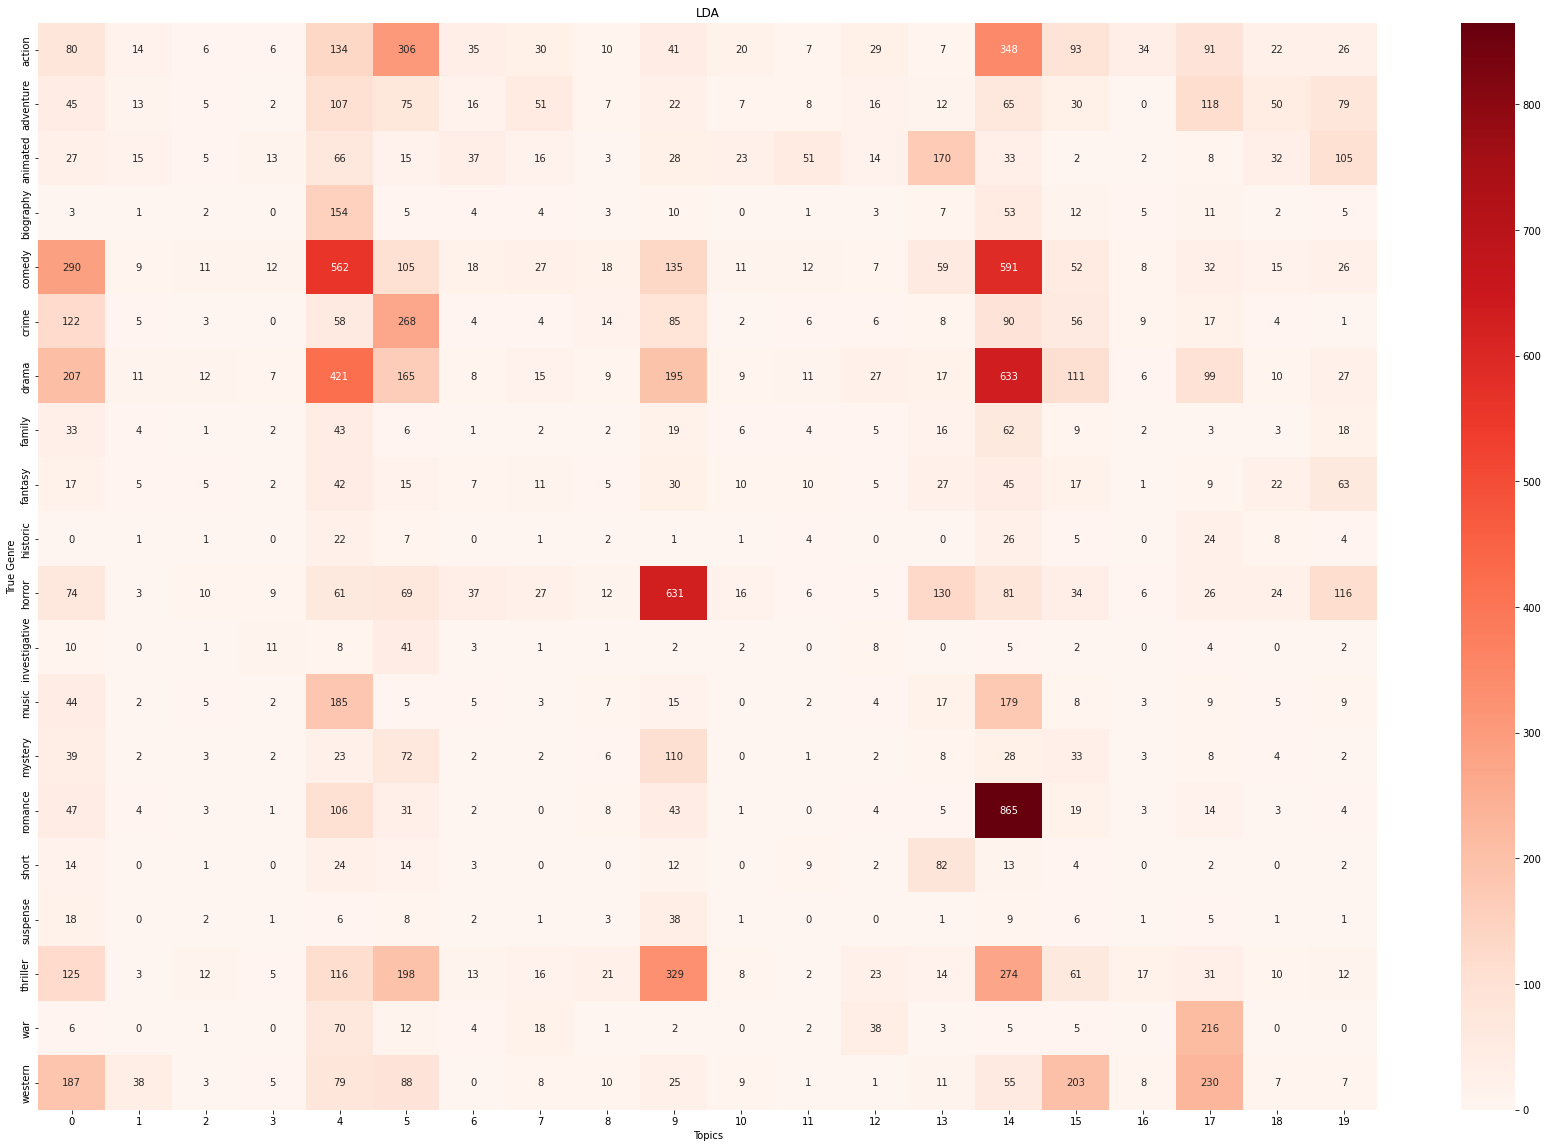

In [ ]:
dominant_topics = df_lda['Topics']
genres = df_lda['Genre']

plt.figure(figsize=(30,20))
sns.heatmap(pd.crosstab(genres, dominant_topics), annot=True, fmt='', cmap='Reds' )
plt.title('LDA')
plt.ylabel('True Genre')
plt.show()

Combining both the notebook and the heatmap several considerations could be made to infer the movie genres from an unlabeled point of view using the Latent Dirichlet Allocation. 

We can observe for example that the topic 9 is assigned 631 times to the genre **Horror**: it seems correct as some of the most frequent words are *creature, monster, forest, attack, soul, kill, destroy* 

The 5th category instead seems to be related to the genres **action** (306), **crime** (268) and **thriller** (198): the most significant words are indeed *kill,
police, escape, murder, arrest, shoot, prison* which are plausible to all these 3 genres. 

On the other hand, the most controversial topic is the 14th one since we can observe high values both for **Romance** (865) and for **Drama** (633) and **Comedy** (591). 

Let's now see from the notebook the most relevant words: *king, princess,
palace,
treasure,
sword,
emperor,
prince,
castle,
knight*
that all suggest some medieval comedies/romances. 








# Neural Netwworks based approach

At this stage, we are ready to implement the neural networks. 

First, we need to tokenize and vectorize the text. 

##Tokenization

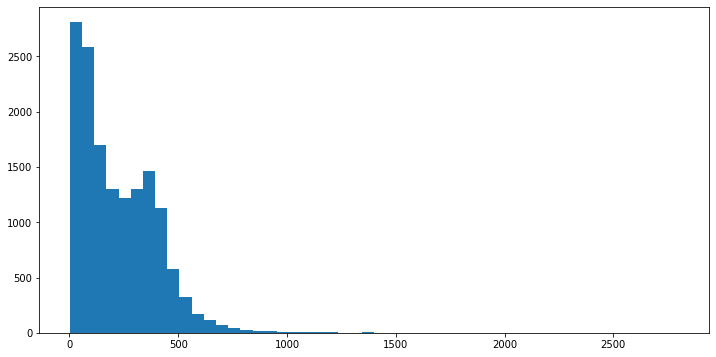

In [ ]:
lengths = []
for i in df['Plot']:
    words = i.split()
    lengths.append(len(words))

plt.figure(figsize = (12,6))
plt.hist(lengths, bins = 50)
plt.xlabel = ('Length of the Plot')
plt.ylabel = ('Number of Plots')
plt.title = ('Plots length distribution')
plt.show()

In [ ]:
import numpy as np
max_features = np.quantile(lengths, q = 0.75)
max_features=int(max_features)
max_features

349

max_features specifies the maximum number of words to keep, based on word frequency. When creating a Tokenizer object, setting num_words to a positive integer, will make the Tokenizer keep only the most frequent num_words words in the vocabulary, and will ignore the rest.

For example, if you set num_words=5000, the Tokenizer will only keep the 5000 most frequent words in the vocabulary. 

We decided to set the number of max features equal to the 75th percentile of the word lengths distribution. 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Tokenize the movie plots and convert them to sequences of word indices
def create_sequences(texts, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return sequences, tokenizer

sequences, tokenizer = create_sequences(df['Plot'], max_length=max_features)

In [ ]:
sequences.shape

(14909, 349)

The code above defines a function called `create_sequences` that takes in two arguments:

> `texts`: a list of strings, representing a series of text to be processed;

> `max_length`: an integer, representing the maximum length for the sequences that will be generated. 

The function begins by instantiating a Tokenizer object from the `Tokenizer` class in the `keras.preprocessing.text module`. 

The `fit_on_texts` method is then called on the tokenizer object, which fits the tokenizer on the input texts and builds the vocabulary index based on word frequency.

Next, the `texts_to_sequences` method is called on the tokenizer object, which converts the texts into a list of sequences, where each sequence is a list of integers representing the word indices in the vocabulary.

The `pad_sequences` function from the `keras.preprocessing.sequence` module is then called to pad the sequences with zeros at the end (post-padding) so that all sequences have the same length, specified by the `max_length `argument.

Finally, the `create_sequences` function returns a tuple containing the padded sequences and the fitted tokenizer object.

##Word Embedding

We are now loading a pre-trained word embedding with **GloVe**. 
[pre-trained global vectors for word representation](https://nlp.stanford.edu/projects/glove/) 

Each line in this file represents a word and its corresponding word embedding, which is a list of 100 floating point values that represent the word in a lower-dimensional space.

The code then splits each line by the space character and assigns the first element (the word) to the variable word and the remaining elements (the word embeddings) to the variable coefs. It then stores the word embeddings in a dictionary called embeddings_index, using the word as the key and the word embeddings as the value.

In [ ]:
f = open('glove.6B.100d.txt')
embeddings_index = {}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#for example
embeddings_index['car']

array([-0.1684  , -0.53827 ,  0.31155 , -0.53218 ,  0.26678 , -0.13638 ,
        0.36621 ,  0.68383 ,  0.77726 ,  0.68049 ,  0.69137 ,  0.2103  ,
        0.091065,  0.24845 , -0.16157 ,  0.46291 , -0.1503  ,  0.2562  ,
       -0.1199  ,  0.5913  ,  1.0351  , -0.2052  ,  0.30244 , -0.34101 ,
        0.6326  , -0.31603 , -0.9959  , -0.33583 ,  0.25161 ,  0.10323 ,
        0.019611,  0.54893 , -0.33433 ,  0.29617 ,  0.41218 ,  0.4207  ,
        0.25775 ,  0.12709 ,  0.80269 ,  0.61944 ,  0.54316 , -0.5941  ,
        0.87551 , -0.063686, -0.29117 ,  0.61609 ,  0.33376 ,  0.14488 ,
       -0.039021, -1.1849  , -0.45951 ,  0.15631 , -0.50818 ,  1.2357  ,
        0.30965 , -1.958   , -1.1872  ,  1.2027  ,  2.1138  ,  0.083629,
        0.54319 ,  0.78883 ,  0.35416 ,  0.87736 ,  0.54007 , -0.10454 ,
        0.075371, -0.45727 , -0.27466 ,  0.11838 , -0.49412 , -0.61325 ,
        0.071519, -0.57665 ,  0.21371 ,  0.62137 ,  1.4404  , -0.34033 ,
       -0.89958 , -0.69605 ,  0.74058 ,  0.52105 , 

At this point we initialize the embedding matrix using the Glove embeddings. 

For each word, we retrieve its embedding vector from the 'embeddings_index' dictionary using the 'get()' method. If an embedding vector was found, it is assigned to the corresponding row in the 'embedding_matrix' using the index as the row index. 

In [ ]:
# Create the embedding matrix using the GloVe embeddings
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
#Visualize the embedding matrix
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22556999,  0.49417999,  0.48609999, ..., -0.45743999,
         0.49645999,  0.34906   ],
       [ 0.081466  ,  0.26043001,  0.57471001, ...,  0.51850998,
         0.47457999, -0.076461  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22321001, -0.23767   , -0.16424   , ..., -0.39300001,
         0.36866999, -0.10538   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

#Division of the dataset in train and test
Y = pd.get_dummies(df['Genre']).values
X_train, X_test, y_train, y_test = train_test_split(sequences,Y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

##Bi-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Input, Reshape, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam


We are now ready to implement a neural network. After many trials, the model with the best results is Bi-LSTM

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], 
                    input_length=sequences.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 349, 100)          11323600  
                                                                 
 bidirectional (Bidirectiona  (None, 349, 256)         234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", min_delta=-0.001, patience=2, verbose=1, mode="auto", restore_best_weights=False)

model.fit(X_train, y_train, epochs=20, batch_size=128, callbacks=[callback],validation_data = (X_val, y_val))

Epoch 1/20
75/75 [==============================] - 19s 118ms/step - loss: 2.7855 - accuracy: 0.1347 - val_loss: 2.4653 - val_accuracy: 0.2284
Epoch 2/20
75/75 [==============================] - 7s 99ms/step - loss: 2.5398 - accuracy: 0.2034 - val_loss: 2.3293 - val_accuracy: 0.2976
Epoch 3/20
75/75 [==============================] - 8s 105ms/step - loss: 2.3344 - accuracy: 0.2698 - val_loss: 2.1116 - val_accuracy: 0.3546
Epoch 4/20
75/75 [==============================] - 8s 109ms/step - loss: 2.1828 - accuracy: 0.3169 - val_loss: 2.1057 - val_accuracy: 0.3554
Epoch 5/20
75/75 [==============================] - 7s 100ms/step - loss: 1.9770 - accuracy: 0.3756 - val_loss: 1.9995 - val_accuracy: 0.3776
Epoch 6/20
75/75 [==============================] - 8s 101ms/step - loss: 1.8818 - accuracy: 0.4027 - val_loss: 2.1246 - val_accuracy: 0.3441
Epoch 7/20
75/75 [==============================] - 8s 113ms/step - loss: 1.7187 - accuracy: 0.4613 - val_loss: 2.0169 - val_accuracy: 0.3793
Epoch 

In [ ]:
#Performance of test set
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions,axis=1)

y_test_classes = np.argmax(y_test, axis=1)
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 64)

print("Test accuracy: %.3f" % (acc)) 

94/94 [==============================] - 4s 26ms/step
47/47 - 1s - loss: 2.1038 - accuracy: 0.3568 - 1s/epoch - 28ms/step
Test accuracy: 0.357


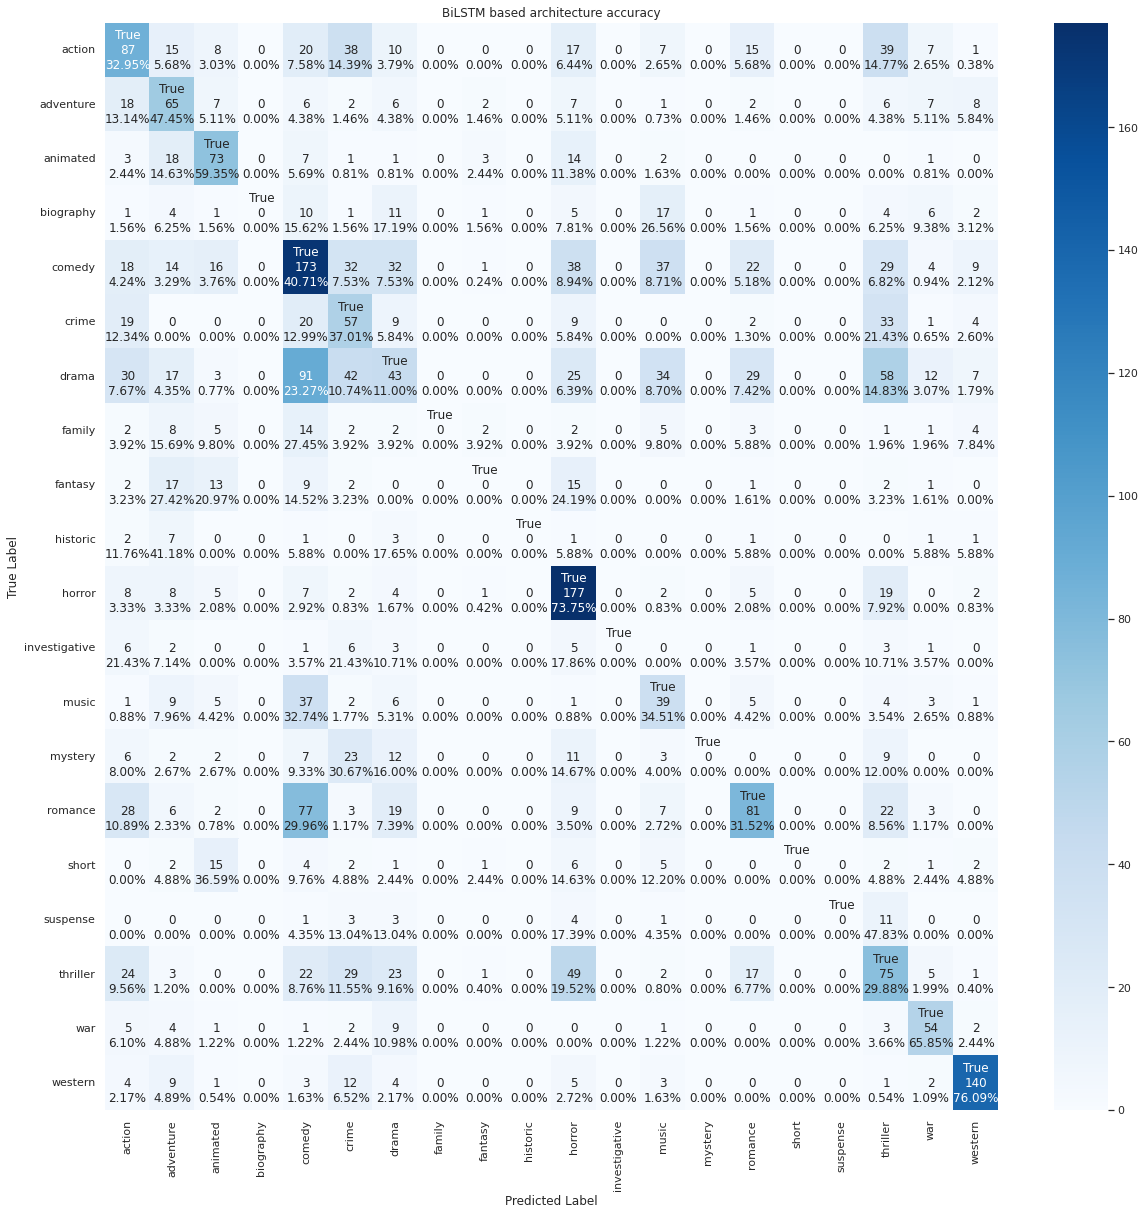

In [ ]:
#Confusion matrix to visualize results
from sklearn.metrics import confusion_matrix

cf_matrix_BiLSTM = confusion_matrix(y_test_classes, predictions_classes)
TF_labels = ['']*len(cf_matrix_BiLSTM)*len(cf_matrix_BiLSTM)
for i in range(len(cf_matrix_BiLSTM)):
  TF_labels[i*20 + i] = 'True'

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_BiLSTM.flatten()] 
cmn = cf_matrix_BiLSTM.astype('float') / cf_matrix_BiLSTM.sum(axis=1)[:, np.newaxis]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmn.flatten()] 

labels2=['action','adventure','animated','biography','comedy','crime','drama','family','fantasy','historic','horror','investigative','music','mystery','romance','short','suspense','thriller','war','western']

labels = [f"{l}\n{gc}\n{gp}" for l, gc, gp in
          zip(TF_labels, group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(20,20)
plt.figure(figsize = (20,20))
sns.set(font_scale=1)


sns.heatmap(cf_matrix_BiLSTM, annot=labels, fmt='', cmap='Blues', xticklabels=labels2, yticklabels=labels2) 
plt.title('BiLSTM based architecture accuracy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test_classes, predictions_classes,target_names=labels2)) 

               precision    recall  f1-score   support

       action       0.33      0.33      0.33       264
    adventure       0.31      0.47      0.37       137
     animated       0.46      0.59      0.52       123
    biography       0.00      0.00      0.00        64
       comedy       0.34      0.41      0.37       425
        crime       0.22      0.37      0.27       154
        drama       0.21      0.11      0.15       391
       family       0.00      0.00      0.00        51
      fantasy       0.00      0.00      0.00        62
     historic       0.00      0.00      0.00        17
       horror       0.44      0.74      0.55       240
investigative       0.00      0.00      0.00        28
        music       0.23      0.35      0.28       113
      mystery       0.00      0.00      0.00        75
      romance       0.44      0.32      0.37       257
        short       0.00      0.00      0.00        41
     suspense       0.00      0.00      0.00        23
     thri

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even if the accuracy we get is much higher than a random choice, we are not satisfied since there are some classes for which our model is unable to predict correctly. This could be due to the fact that some classes are similar or under represented. We try BERT architecture to see if we can get to better results

# Transformer Based Approach

## BERT base

BERT stands for Bidirectional Encoder Representations from Transformers. It's designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context.

The pre-trained BERT model can be fine-tuned with just one additional output layer to create models for a wide range of NLP tasks.

BERT base has 12 layers, 768 hidden states and 12 attention heads. It takes a sequence of word as input which flow up the stack. Each layer applies self attention and results are passed through a feed-forward network.

The first input token is supplied with a special [CLS] token, which stands for Classification.

Each position outputs a vector of size 768, for classification we focus only on the first position, that we passed the special [CLS] token to.

We initialize all parameters from the pre-trained model and fine-tune them in the fine-tuning stages.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [ ]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,film opens two bandits breaking railroad teleg...
1,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,rarebit fiend gorges welsh rarebit restaurant ...
2,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,western,https://en.wikipedia.org/wiki/From_Leadville_t...,film features train traveling rockies hold cre...
3,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,irish villager kathleen tenant captain clearfi...
4,1907,Daniel Boone,American,Wallace McCutcheon and Ediwin S. Porter,"William Craven, Florence Lawrence",biography,https://en.wikipedia.org/wiki/Daniel_Boone_(19...,boones daughter befriends indian maiden boone ...


In [ ]:
df['Genre'].unique()

array(['western', 'short', 'biography', 'adventure', 'horror', 'crime',
       'fantasy', 'historic', 'mystery', 'romance', 'investigative',
       'animated', 'war', 'thriller', 'action', 'music', 'suspense',
       'family', 'comedy', 'drama'], dtype=object)

In [ ]:
clas=[1] * len(df['Genre'])
for i in range(len(df['Genre'])):
  if df['Genre'][i] == 'western':
    clas[i] = 0
  if df['Genre'][i] == 'short':
    clas[i] = 1
  if df['Genre'][i] == 'biography':
    clas[i] = 2
  if df['Genre'][i] == 'adventure':
    clas[i] = 3
  if df['Genre'][i] == 'horror':
    clas[i] = 4
  if df['Genre'][i] == 'crime':
    clas[i] = 5
  if df['Genre'][i] == 'fantasy':
    clas[i] = 6
  if df['Genre'][i] == 'historic':
    clas[i] = 7
  if df['Genre'][i] == 'mystery':
    clas[i] = 8
  if df['Genre'][i] == 'romance':
    clas[i] = 9
  if df['Genre'][i] == 'investigative':
    clas[i] = 10
  if df['Genre'][i] =='animated':
    clas[i] = 11
  if df['Genre'][i] == 'war':
    clas[i] = 12
  if df['Genre'][i] == 'thriller':
    clas[i] = 13
  if df['Genre'][i] == 'action':
    clas[i] = 14
  if df['Genre'][i] == 'music':
    clas[i] = 15
  if df['Genre'][i] == 'suspense':
    clas[i] = 16
  if df['Genre'][i] == 'family':
    clas[i] = 17
  if df['Genre'][i] == 'comedy':
    clas[i] = 18
  if df['Genre'][i] == 'drama':
    clas[i] = 19


In [ ]:
df['Genre_int'] = clas

In [ ]:
df = df.drop(['Release Year', 'Title','Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1)
df.head()

,Genre,Plot,Genre_int
6,western,The film opens with two bandits breaking into ...,0
10,short,The Rarebit Fiend gorges on Welsh rarebit at a...,1
11,western,The film features a train traveling through th...,0
12,short,Irish villager Kathleen is a tenant of Captain...,1
13,biography,Boone's daughter befriends an Indian maiden as...,2


We take a test dataset for future evaluation of the performance metrics. 

In [ ]:
from sklearn.model_selection import train_test_split

Y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(df['Plot'],Y, test_size = 0.1, random_state = 42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13418,) (13418,)
(1491,) (1491,)


In [ ]:
df.shape

(14909, 3)

In [ ]:
test_dataset = pd.DataFrame([y_test, X_test]).transpose()#.reset_index(drop=True)
test_dataset.head()

,Genre,Plot
25432,adventure,Captain Amar Kumar of the Indian army lives wi...
30835,drama,"When Saravanan goes to Hyderabad, Kanniah plag..."
18542,mystery,This is not a Bulldog Drummond picture despite...
27492,comedy,The film revolves around the typical life of f...
6947,animated,The screen pans on the silhouette of a mighty ...


In [ ]:
df = df.drop(test_dataset.index)
df.shape

(13418, 3)

In [ ]:
test_dataset = test_dataset.reset_index(drop = True)
test_dataset.head()

,Genre,Plot
0,adventure,Captain Amar Kumar of the Indian army lives wi...
1,drama,"When Saravanan goes to Hyderabad, Kanniah plag..."
2,mystery,This is not a Bulldog Drummond picture despite...
3,comedy,The film revolves around the typical life of f...
4,animated,The screen pans on the silhouette of a mighty ...


We initialize the tokenizer with the BertTokenizer function, specifying that the model we want to use it for is BERT base.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Let's see how this tokenizer works by selecting the first Plot.

We choose the parameter for padding and truncation as before, in order to capture 75% of the text: 349

In [ ]:
token = tokenizer.encode_plus(
    df['Plot'].iloc[0], 
    max_length=349, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, #[CLS],[PAD],[SEP]
    return_tensors='tf'
)

We can then investigate the input ids:
* length is equal to 349 
* each token is represented by an index which corresponds to the BERT embedding
* zeroes correspond to our padding tokens

In [ ]:
token.input_ids

<tf.Tensor: shape=(1, 349), dtype=int32, numpy=
array([[  101,  1109,  1273,  7086,  1114,  1160,  1467,  6439,  4440,
         1154,   170,  5786, 22821,  1701,   117,  1187,  1152,  2049,
         1103,  6650,  1120,  2560,  7587,  1106,  1138,   170,  2669,
         2141,  1105,  1106, 21994,  3791,  1111,  1103,  3806,  1106,
         5475,  1103,  8502,   112,   188,  8886,  1120,  1103,  1466,
          112,   188,  1447,  4890,   119,  1220,  1173,  7466,  1103,
         6650,  1149,  1105,  5069,  1140,  1146,   119,  1249,  1103,
         2669,  6260,  1122,  1110, 18666,  1118,  1103,  1467,  6439,
          783,  1208,  1300,   119,  1960,  1467,  6439,  3873,  1126,
         6848,  1610,   117,  2311,   170, 17957,  1105,  1501,   170,
         2884,  1104,  7468,  1116,  1114,   173, 24027,   132,  1103,
         1639,  2311,  1103,  1783,  1399,  1105,  2049,  1103,  3806,
         1106,  9700,  1103,  2669,  1105, 19959, 10934,  5822,  1103,
         8502,   119,  1109, 

The **attention mask** is used to indicate which tokens the model should pay attention to and which ones it should ignore. For example, if an attention mask is provided with all 1s, it tells the model to pay attention to all of the tokens in the input text. If an attention mask is provided with some 0s, it tells the model to ignore the tokens corresponding to the 0s in the attention mask.

In [ ]:
token.attention_mask

<tf.Tensor: shape=(1, 349), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

We create two arrays to store the values for the input ids and the attention masks, that we will need as input for our BERT model.

In [ ]:
X_input_ids = np.zeros((len(df), 349))
X_attn_masks = np.zeros((len(df), 349))

The next step is to generate the training data: we're going to fill the empty arrays we've just created by tokenizing each plot.

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['Plot'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=349, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

Now we have to define also the labels array and we're going to use these labels as a one hot encoded target vector

In [ ]:
labels = np.zeros((len(df), 20))
labels.shape

(13418, 20)

In [ ]:
labels[np.arange(len(df)), df['Genre_int'].values] = 1 # one-hot encoded target tensor

The tf.data.Dataset API supports writing descriptive and efficient input pipelines making easier the training process. 

The following code defines a function `DatasetMapFunction` that takes in three arguments: `input_ids`, `attn_masks`, and `labels`. 

The function returns a tuple containing a dictionary and the labels argument.

The purpose of this function is to map the input data to a format that can be consumed by the machine learning BERT model. The dictionary contains the input token ids (input_ids) and attention masks (attention_mask) that are used as input to the model, and the labels argument is used as the ground truth output of the model.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data
     

<TakeDataset element_spec=(TensorSpec(shape=(349,), dtype=tf.float64, name=None), TensorSpec(shape=(349,), dtype=tf.float64, name=None), TensorSpec(shape=(20,), dtype=tf.float64, name=None))>

In [ ]:
def DatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels
     

In [ ]:
dataset = dataset.map(DatasetMapFunction) # converting to required format for tensorflow dataset 

In [ ]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(349,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(349,), dtype=tf.float64, name=None)}, TensorSpec(shape=(20,), dtype=tf.float64, name=None))>

We're going to shuffle the training dataset and provide a batch size to it. 



In [ ]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [ ]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 349), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 349), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 20), dtype=tf.float64, name=None))>

Then we choose to have only 80% of our dataset as our training dataset and 20% as our validation dataset

In [ ]:
p = 0.8
train_size = int((len(df)//16)*p)

In [ ]:
train_size

670

In [ ]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

## Model Definition

In [ ]:
from transformers import TFBertModel

In [ ]:
model = TFBertModel.from_pretrained('bert-base-cased') 
# bert base model with pretrained weights

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Here we define:
* two input layers for input ids and attention masks
* the BERT embeddings layer using the BERT model
* the intermediate layer
* the output layer using softmax as our classification activation function

In [ ]:
input_ids = tf.keras.layers.Input(shape=(349,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(349,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(20, activation='softmax', name='output_layer')(intermediate_layer) 

movie_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
movie_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 349)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 349)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 349,                                           

We define the optimizer, the loss function and the metrics as follows


In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
movie_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
hist = movie_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
670/670 [==============================] - 117s 160ms/step - loss: 2.2353 - accuracy: 0.3006 - val_loss: 1.7562 - val_accuracy: 0.4494
Epoch 2/10
670/670 [==============================] - 106s 158ms/step - loss: 1.5787 - accuracy: 0.4965 - val_loss: 1.3898 - val_accuracy: 0.5502
Epoch 3/10
670/670 [==============================] - 105s 157ms/step - loss: 1.3299 - accuracy: 0.5645 - val_loss: 1.0710 - val_accuracy: 0.6603
Epoch 4/10
670/670 [==============================] - 105s 157ms/step - loss: 1.1413 - accuracy: 0.6368 - val_loss: 0.9015 - val_accuracy: 0.7094
Epoch 5/10
670/670 [==============================] - 106s 157ms/step - loss: 0.9471 - accuracy: 0.6926 - val_loss: 0.6951 - val_accuracy: 0.7879
Epoch 6/10
670/670 [==============================] - 106s 157ms/step - loss: 0.7756 - accuracy: 0.7563 - val_loss: 0.4765 - val_accuracy: 0.8638
Epoch 7/10
670/670 [==============================] - 105s 157ms/step - loss: 0.5912 - accuracy: 0.8160 - val_loss: 0.3794 -

The accuracy reached on the validation set at the end of the 10th epoch is around 95%

In [ ]:
movie_model.save('movie_model')

###Prediction on Test dataset and Confusion Matrix

In [ ]:
movie_model = tf.keras.models.load_model('movie_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=349, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['western', 'short', 'biography', 'adventure', 'horror', 'crime',
       'fantasy', 'historic', 'mystery', 'romance', 'investigative',
       'animated', 'war', 'thriller', 'action', 'music', 'suspense',
       'family', 'comedy', 'drama']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
test_dataset['Predicted Genre'] = 'None'
for i in range(test_dataset.shape[0]):
    processed_data = prepare_data(test_dataset['Plot'].iloc[i], tokenizer)
    test_dataset['Predicted Genre'].iloc[i] = make_prediction(movie_model, processed_data=processed_data)


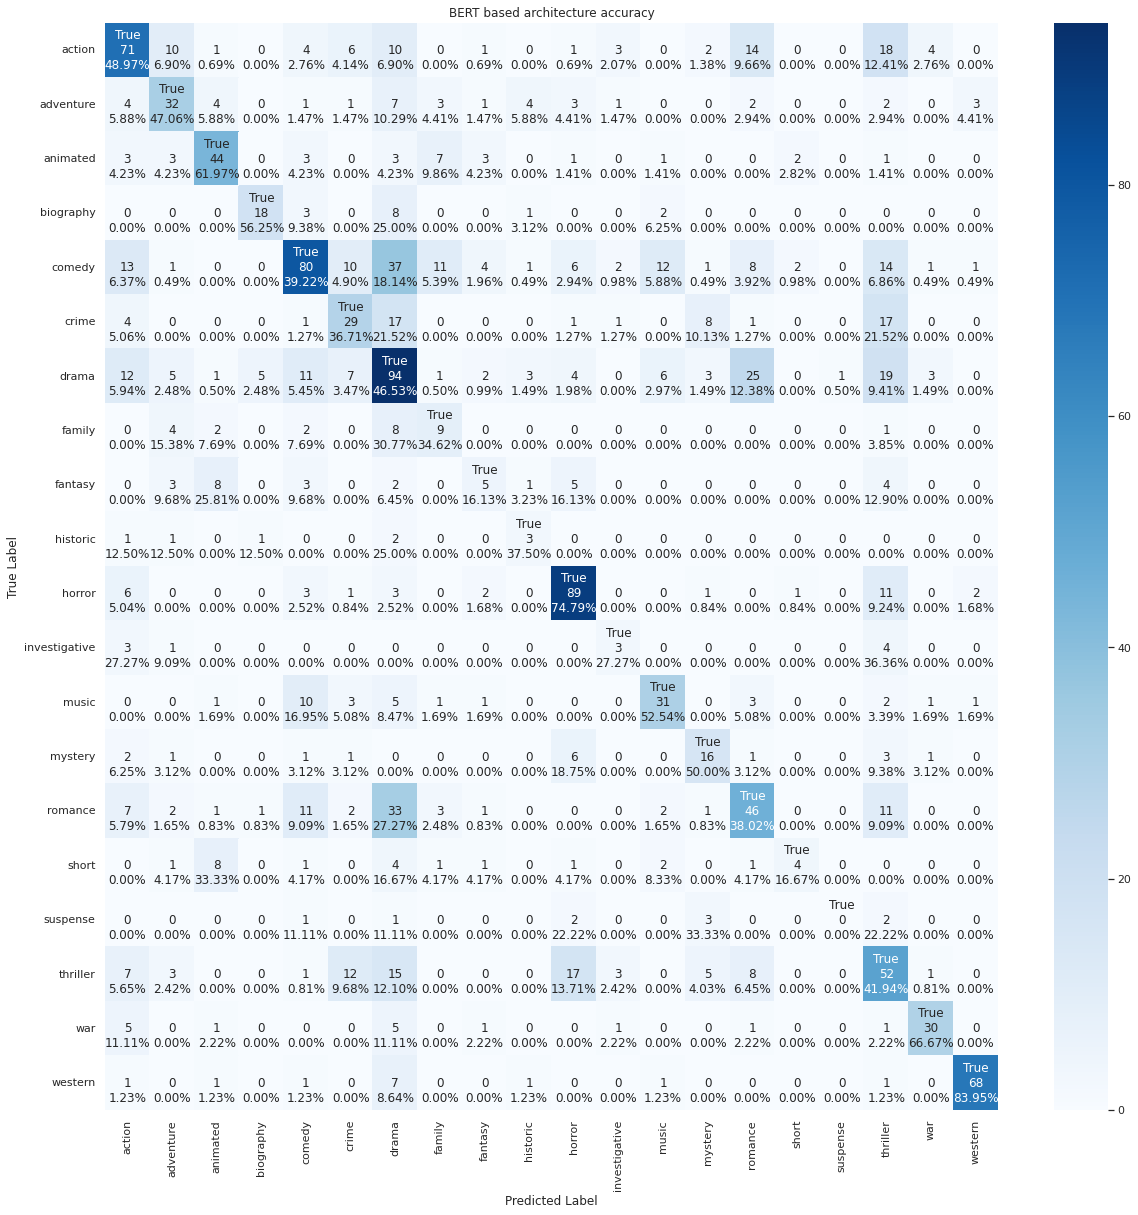

In [ ]:
#Confusion matrix to visualize results
from sklearn.metrics import confusion_matrix

y_test_classes = test_dataset['Genre']
predictions_classes = test_dataset['Predicted Genre']

cf_matrix_BERT = confusion_matrix(y_test_classes, predictions_classes)
TF_labels = ['']*len(cf_matrix_BERT)*len(cf_matrix_BERT)
for i in range(len(cf_matrix_BERT)):
  TF_labels[i*20 + i] = 'True'

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_BERT.flatten()] 
cmn = cf_matrix_BERT.astype('float') / cf_matrix_BERT.sum(axis=1)[:, np.newaxis]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmn.flatten()] 

labels2=['action','adventure','animated','biography','comedy','crime','drama',
         'family','fantasy','historic','horror','investigative','music','mystery',
         'romance','short','suspense','thriller','war','western']

labels = [f"{l}\n{gc}\n{gp}" for l, gc, gp in
          zip(TF_labels, group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(20,20)
plt.figure(figsize = (20,20))
sns.set(font_scale=1)


sns.heatmap(cf_matrix_BERT, annot=labels, fmt='', cmap='Blues', xticklabels=labels2, yticklabels=labels2) 
plt.title('BERT based architecture accuracy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test_classes, predictions_classes,target_names=labels2))

               precision    recall  f1-score   support

       action       0.51      0.49      0.50       145
    adventure       0.48      0.47      0.47        68
     animated       0.61      0.62      0.62        71
    biography       0.72      0.56      0.63        32
       comedy       0.58      0.39      0.47       204
        crime       0.40      0.37      0.38        79
        drama       0.36      0.47      0.41       202
       family       0.25      0.35      0.29        26
      fantasy       0.23      0.16      0.19        31
     historic       0.21      0.38      0.27         8
       horror       0.65      0.75      0.70       119
investigative       0.21      0.27      0.24        11
        music       0.54      0.53      0.53        59
      mystery       0.40      0.50      0.44        32
      romance       0.42      0.38      0.40       121
        short       0.44      0.17      0.24        24
     suspense       0.00      0.00      0.00         9
     thri

###Prediction on unknowns

Now we're going to predict the 'unknown' genre from our dataset using the BERT model initialized before, adding the column 'Predicted Genre' to the uknown dataset

In [ ]:
unknowns['Predicted Genre'] = 'None'
for i in range(unknowns.shape[0]):
    processed_data = prepare_data(unknowns['Plot'].iloc[i], tokenizer)
    unknowns['Predicted Genre'].iloc[i] = make_prediction(movie_model, processed_data=processed_data)


In [ ]:
unknowns.iloc[5330]

Release Year                                                     1996
Title                   Doraemon: Nobita and the Galaxy Super-express
Origin/Ethnicity                                             Japanese
Director                          Shibayama, TsutomuTsutomu Shibayama
Cast                                                              NaN
Genre                                                         unknown
Wiki Page           https://en.wikipedia.org/wiki/Doraemon:_Nobita...
Plot                In the park where they normally meet, Suneo in...
Predicted Genre                                              animated
Name: 33245, dtype: object

Here we selected randomly a plot; in this case **"Doraemon: Nobita and the Galaxy Super-express"** that is a famous Japanese anime/cartoon: our model predicted correctly **"animated"**

In [ ]:
unknowns.iloc[1378]

Release Year                                                     1998
Title                                                  Ballistic Kiss
Origin/Ethnicity                                            Hong Kong
Director                                                   Donnie Yen
Cast                               Donnie Yen, Annie Wu, Yu Rongguang
Genre                                                         unknown
Wiki Page                https://en.wikipedia.org/wiki/Ballistic_Kiss
Plot                Cat (Donnie Yen) is an aimless killer, no matt...
Predicted Genre                                              thriller
Name: 23429, dtype: object

Again, our model predicted correctly a random movie chosen from the unknown dataset. 

**Ballistic Kiss** is a 1998 Hong Kong action thriller film produced and directed by Donnie Yen and starring Yen and Annie Wu.



In [ ]:
unknowns.iloc[5999]

Release Year                                                     2015
Title                                                    The Magician
Origin/Ethnicity                                         South_Korean
Director                                                Kim Dae-seung
Cast                                Yoo Seung-ho, Go Ara, Kwak Do-won
Genre                                                         unknown
Wiki Page               https://en.wikipedia.org/wiki/Joseon_Magician
Plot                A story of the famous magician in Joseon Era w...
Predicted Genre                                               fantasy
Name: 34743, dtype: object

**The Magician** is a 2015 South Korean period fantasy film directed by Kim Dae-seung and our model predicted correctly its genre. 

# Model Comparison 

Comparing the two models implemented before in terms of overall accuracy, we can definitely state that the BERT model outperforms the Bi-LSTM as all the classes are better predicted. 